# Introduction to DOLFINx
We start by importing DOLFINx, and check the version and git commit hash

In [1]:
import dolfinx
print(f"You have DOLFINx {dolfinx.__version__} installed, " +
      "based on commit \nhttps://github.com/FEniCS/dolfinx/commit/"
      + f"{dolfinx.common.git_commit_hash}")

You have DOLFINx 0.4.2.0 installed, based on commit 
https://github.com/FEniCS/dolfinx/commit/5444c70acfcfd5b934f0a28b22551f1587ecd1f5


## Using a 'built-in' mesh
No wildcards `*`, as in old DOLFIN, i.e.
```python
from dolfin import *
```

We instead import `dolfinx.mesh` as a module

In [2]:
import dolfinx
from mpi4py import MPI
mesh = dolfinx.mesh.create_unit_square(MPI.COMM_WORLD, 10, 10)

## Interface to external libraries
We use external libraries, such as `pyvista` for plotting.import dolfinx.plot

In [3]:
import dolfinx.plot
import pyvista
topology, cells, geometry = dolfinx.plot.create_vtk_mesh(mesh)
grid = pyvista.UnstructuredGrid(topology, cells, geometry)

We add settings for both static and interactive plotting

In [4]:
pyvista.start_xvfb(0.5)
pyvista.set_jupyter_backend("pythreejs")

In [5]:
plotter = pyvista.Plotter()
renderer = plotter.add_mesh(grid, show_edges=True)

In [6]:
# Settings for presentation mode
plotter.view_xy()
plotter.camera.zoom(1.35)

In [7]:
img = plotter.screenshot("fundamentals_mesh.png",
                         transparent_background=True,
                         window_size=(800,800))

## Plot mesh using matplotlib

In the hidden cell you can expand the settings to get a static plot using matplotlib. 

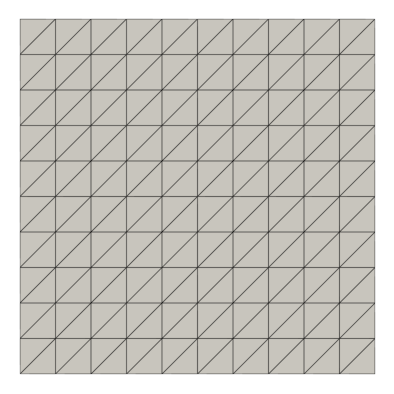

In [8]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.gcf().set_size_inches(7,7)
fig = plt.imshow(img)

## Interactive plot
We can get interactive plots in notebook by calling.

In [9]:
plotter.show()

2022-08-11 16:05:48.341 (   1.492s) [        CF886000]    vtkExtractEdges.cxx:435   INFO| Executing edge extractor: points are renumbered
2022-08-11 16:05:48.341 (   1.493s) [        CF886000]    vtkExtractEdges.cxx:551   INFO| Created 320 edges


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(intensity=0.25, position=(50000.0, 50000.0, 27320…